# Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('../content/concrete.csv')
dataset.head(5)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
dataset.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df=scaler.fit(dataset).transform(dataset)
df

array([[1.        , 0.        , 0.        , ..., 0.20572002, 0.07417582,
        0.96748474],
       [1.        , 0.        , 0.        , ..., 0.20572002, 0.07417582,
        0.74199576],
       [0.52625571, 0.39649416, 0.        , ..., 0.        , 0.73901099,
        0.47265479],
       ...,
       [0.10616438, 0.38786867, 0.54272864, ..., 0.46663322, 0.07417582,
        0.26622649],
       [0.1303653 , 0.51947691, 0.        , ..., 0.48896136, 0.07417582,
        0.37922013],
       [0.36278539, 0.27963272, 0.39130435, ..., 0.42022077, 0.07417582,
        0.37461069]])

In [6]:
y=dataset['strength']
X=dataset.drop(columns=['strength'])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

## Gradient Boosting Regressor
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

In [7]:
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor(n_estimators=500, max_depth=4, min_samples_split=2,
                            learning_rate= 0.01, loss='squared_error')
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=500)

In [8]:
y_pred = gbr.predict(X_test)

In [9]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8750722554996611

In [10]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_test, y_pred)

5.722277622594656

/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


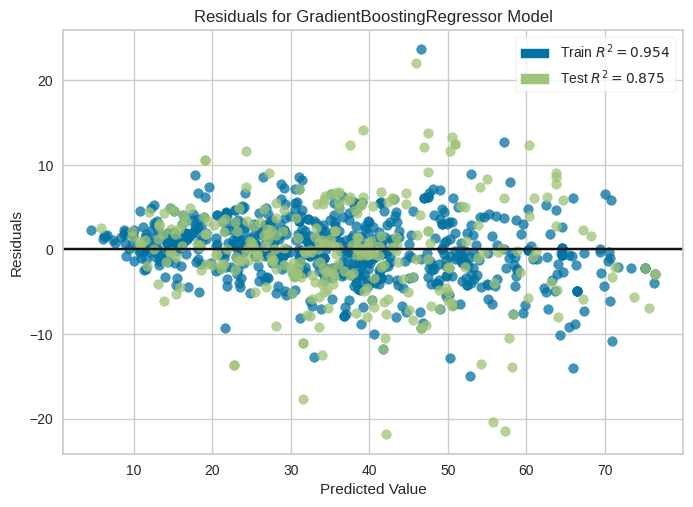

<Axes: title={'center': 'Residuals for GradientBoostingRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [11]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(gbr, hist=False)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


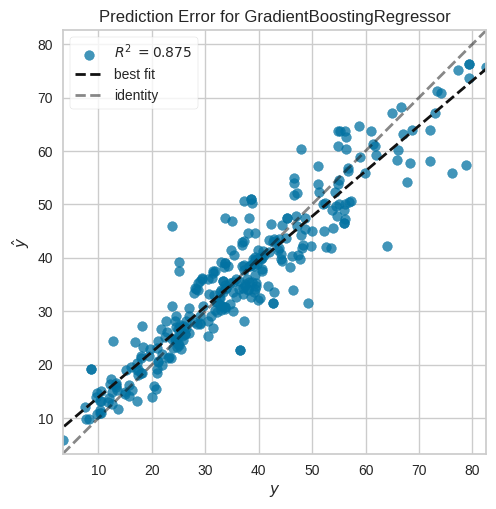

<Axes: title={'center': 'Prediction Error for GradientBoostingRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [12]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(gbr)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

## Neural network
https://scikit-learn.org/1.6/modules/generated/sklearn.neural_network.MLPRegressor.html

In [13]:
from sklearn.neural_network import MLPRegressor
net_01 = MLPRegressor(hidden_layer_sizes=(1),
                    random_state=4,
                    max_iter=2000)

In [14]:
net_01.fit(X_train, y_train)

/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=1, max_iter=2000, random_state=4)

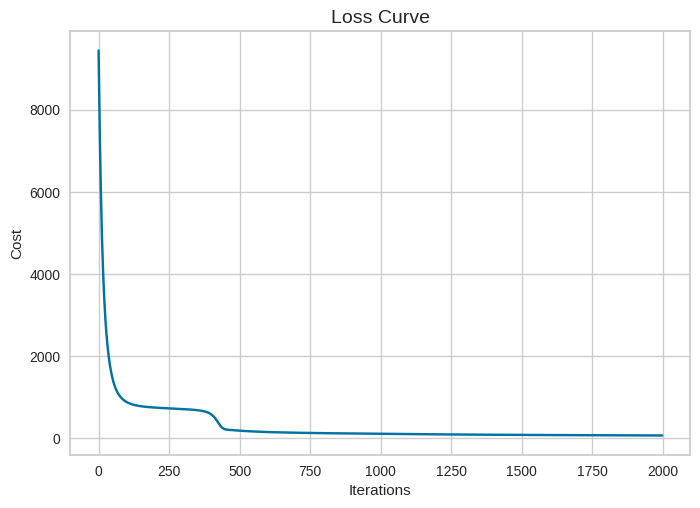

In [15]:
plt.plot(net_01.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [16]:
y_pred_01=net_01.predict(X_test)

In [17]:
# It is the same as r2_score(y_test, y_pred_01)
test_set_rsquared = net_01.score(X_test, y_test)
test_set_rmse = root_mean_squared_error(y_test, y_pred_01)

print('R_squared value: ', test_set_rsquared)
print('RMSE: ', test_set_rmse)

R_squared value:  0.4515917102825603
RMSE:  11.989235202196019


/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


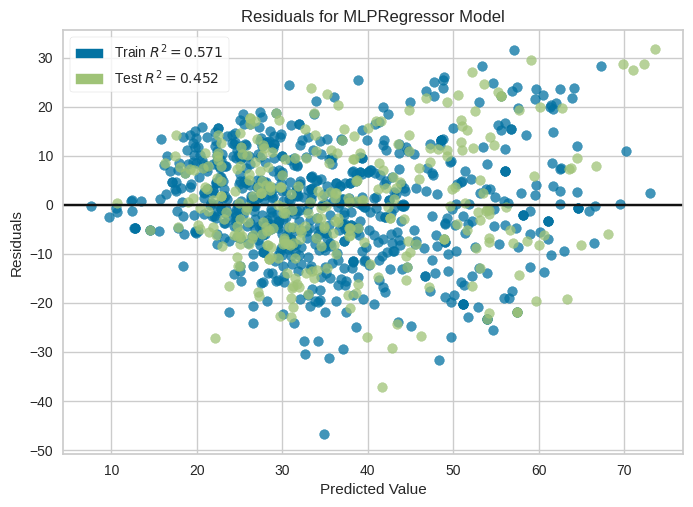

<Axes: title={'center': 'Residuals for MLPRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [18]:
visualizer = ResidualsPlot(net_01, hist=False)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


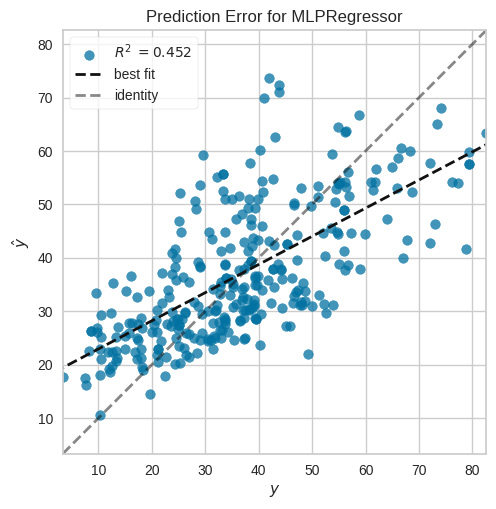

<Axes: title={'center': 'Prediction Error for MLPRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [19]:
visualizer = PredictionError(net_01)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

In [20]:
net_01.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': 1,
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 2000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 4,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [21]:
net_02 = MLPRegressor(hidden_layer_sizes=(8),
                    activation='logistic',
                    random_state=42,
                    max_iter=2000)

In [22]:
net_02.fit(X_train,y_train)
y_pred_02=net_02.predict(X_test)

/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


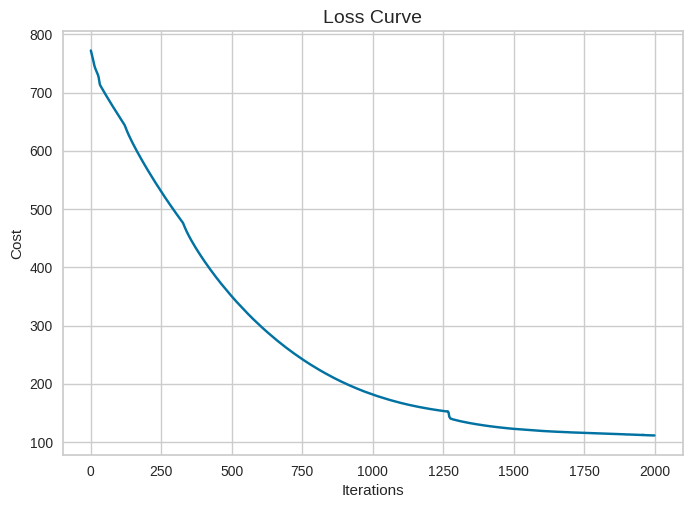

In [23]:
plt.plot(net_02.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [24]:
test_set_rsquared = net_02.score(X_test, y_test)
test_set_rmse = root_mean_squared_error(y_test, y_pred_02)

print('R_squared value: ', test_set_rsquared)
print('RMSE: ', test_set_rmse)

R_squared value:  0.21127531217767015
RMSE:  14.378122920529023


/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


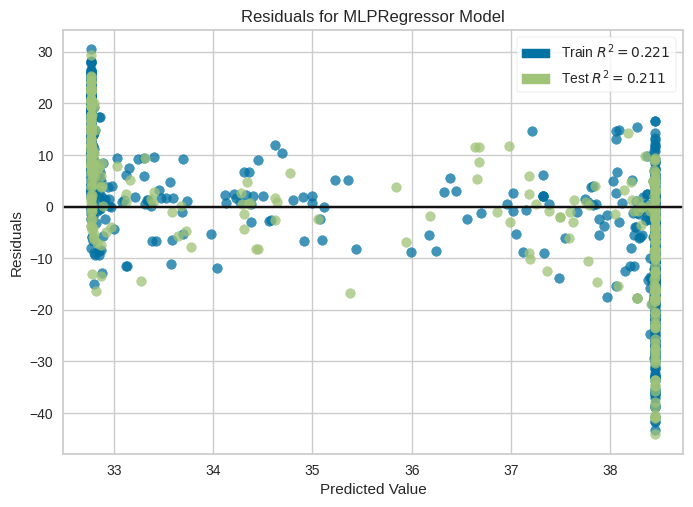

<Axes: title={'center': 'Residuals for MLPRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [25]:
visualizer = ResidualsPlot(net_02, hist=False)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


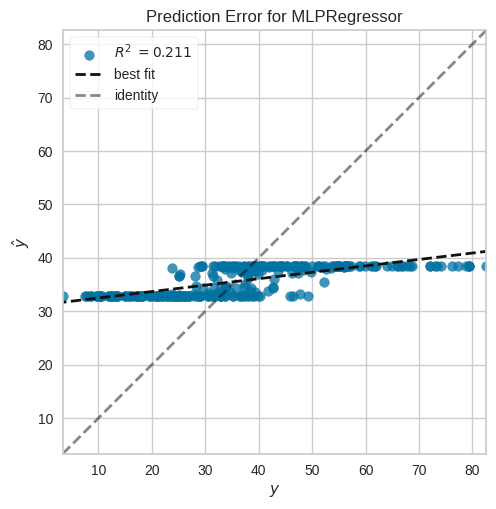

<Axes: title={'center': 'Prediction Error for MLPRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [26]:
visualizer = PredictionError(net_02)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

In [27]:
# Two options to try
param_list = {
                "hidden_layer_sizes": [(1,),(2,)], 
                "activation": ["identity", "logistic", "tanh", "relu"], 
                "solver": ["lbfgs", "sgd", "adam"]
            }

# param_list = {"hidden_layer_sizes": [(1),(2),(3),(8),(8,4)]}


In [28]:
from sklearn.model_selection import GridSearchCV
grid_net = GridSearchCV(estimator=net_01, param_grid=param_list, cv=5)
grid_net.fit(X_train, y_train)

/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-pac

GridSearchCV(cv=5,
             estimator=MLPRegressor(hidden_layer_sizes=1, max_iter=2000,
                                    random_state=4),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(1,), (2,)],
                         'solver': ['lbfgs', 'sgd', 'adam']})

In [29]:
grid_net.best_params_

{'activation': 'relu', 'hidden_layer_sizes': (2,), 'solver': 'lbfgs'}

In [30]:
grid_net.score(X_test,y_test)

0.7836320911800283

In [31]:
param_list2 = {"hidden_layer_sizes": [(1),(2),(8,4)], 'max_iter': [200, 600, 1000]}


In [32]:
grid_net2 = GridSearchCV(estimator=net_01, param_grid=param_list2, cv=5)
grid_net2.fit(X_train, y_train)

/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilaye

GridSearchCV(cv=5,
             estimator=MLPRegressor(hidden_layer_sizes=1, max_iter=2000,
                                    random_state=4),
             param_grid={'hidden_layer_sizes': [1, 2, (8, 4)],
                         'max_iter': [200, 600, 1000]})

In [33]:
grid_net2.best_params_

{'hidden_layer_sizes': (8, 4), 'max_iter': 1000}

In [34]:
grid_net2.score(X_test,y_test)

0.76851808269978

In [35]:
param_list3 = {
                "hidden_layer_sizes": [(1),(2)], 
                "activation": ["identity", "logistic", "tanh", "relu"], 
                "solver": ["lbfgs", "sgd", "adam"],
                'max_iter': [200, 1000, 2000]
            }

In [36]:
grid_net3 = GridSearchCV(estimator=net_01, param_grid=param_list3, cv=5)
grid_net3.fit(X_train, y_train)

/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTI

GridSearchCV(cv=5,
             estimator=MLPRegressor(hidden_layer_sizes=1, max_iter=2000,
                                    random_state=4),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [1, 2],
                         'max_iter': [200, 1000, 2000],
                         'solver': ['lbfgs', 'sgd', 'adam']})

In [37]:
grid_net3.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 2,
 'max_iter': 200,
 'solver': 'lbfgs'}

In [38]:
grid_net3.score(X_test,y_test)

0.779032472852931

In [39]:
best=grid_net3.best_estimator_

/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


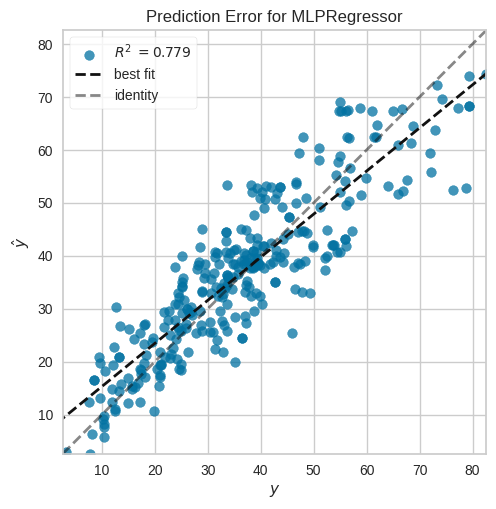

<Axes: title={'center': 'Prediction Error for MLPRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [40]:
visualizer = PredictionError(best)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

In [41]:
param_list4={'learning_rate': [0.001, 0.01, 0.1]}

In [42]:
grid_net4=GridSearchCV(estimator=net_01, param_grid=param_list4, cv=5)
grid_net4.fit(X_train, y_train)
best=grid_net4.best_estimator_
grid_net4.best_params_

ValueError: 
All the 15 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 98, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'learning_rate' parameter of MLPRegressor must be a str among {'constant', 'adaptive', 'invscaling'}. Got 0.001 instead.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 98, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'learning_rate' parameter of MLPRegressor must be a str among {'constant', 'adaptive', 'invscaling'}. Got 0.01 instead.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 98, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'learning_rate' parameter of MLPRegressor must be a str among {'constant', 'adaptive', 'invscaling'}. Got 0.1 instead.


In [ ]:
visualizer = PredictionError(best)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()